<a href="https://colab.research.google.com/github/Egade/evidences-of-activities-Rubenanr/blob/main/Activity_8_Regression_Lin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model

In [3]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/census.csv' 

In [4]:
df = pd.read_csv(path)
df.head(2)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333


In [5]:
df.isnull().any()

SUMLEV         False
REGION         False
DIVISION       False
STATE          False
COUNTY         False
               ...  
RNETMIG2011    False
RNETMIG2012    False
RNETMIG2013    False
RNETMIG2014    False
RNETMIG2015    False
Length: 100, dtype: bool

In [6]:
df.dropna()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [7]:
favs = ['DEATHS2012', 'DIVISION']
ndf = df[favs]
ndf = ndf.dropna()
ndf.shape

(3193, 2)

In [8]:
XX = ndf[['DIVISION']]
y = ndf['DEATHS2012']

In [11]:
df[['DIVISION', 'DEATHS2012']]

,DIVISION,DEATHS2012
0,6,48357
1,6,558
2,6,1879
3,6,291
4,6,237
...,...,...
3188,8,273
3189,8,61
3190,8,115
3191,8,105


In [12]:
type(XX)

pandas.core.frame.DataFrame

In [13]:
from sklearn import linear_model

In [14]:
lm = linear_model.LinearRegression()
model_lm = lm.fit(XX, y)

In [15]:
print('The intercept is \t', model_lm.intercept_)
print('The coefficients are \t', model_lm.coef_)
print('The r^2 is \t', model_lm.score(XX,y))

The intercept is 	 1916.3518133821883
The coefficients are 	 [-67.31716579]
The r^2 is 	 0.00022254086964457187


In [16]:
ndf.head()

,DEATHS2012,DIVISION
0,48357,6
1,558,6
2,1879,6
3,291,6
4,237,6


In [17]:
df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI


DEATHS2012 = b0 +b1DIVISION

In [18]:
favs = ['DEATHS2012', 'DIVISION']
ndf = df[favs]
ndf = ndf.dropna()
ndf.shape
modelA = sm.OLS.from_formula('DEATHS2012 ~ DIVISION',
                             data = ndf)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS2012   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7103
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.399
Time:                        18:51:32   Log-Likelihood:                -33569.
No. Observations:                3193   AIC:                         6.714e+04
Df Residuals:                    3191   BIC:                         6.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1916.3518    443.615      4.320      0.000    1046.553    2786.150
DIVISION     -67.3172     79.875     -0.843      0.399    -223.928      89.294
==============================================================================
Omnibus:                     6232.069   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11984141.304
Skew:                          15.318   Prob(JB):                         0.00
Kurtosis:                     301.562   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
resultA.fittedvalues.describe()

count    3193.000000
mean     1566.884435
std       132.883506
min      1310.497321
25%      1445.131653
50%      1579.765984
75%      1647.083150
max      1849.034648
dtype: float64

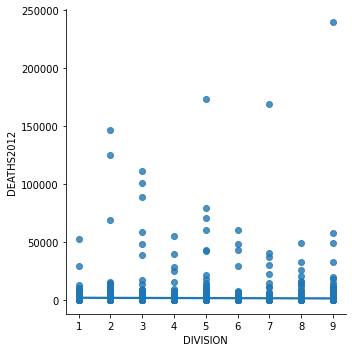

In [28]:
sns.lmplot(x='DIVISION', y='DEATHS2012', data=df)


In [31]:
favs = ['BIRTHS2015', 'REGION']
ndf = df[favs]
ndf = ndf.dropna()
ndf.shape
ndf['REGION'] = ndf['REGION'].astype(str)
modelA = sm.OLS.from_formula('BIRTHS2015 ~ REGION',
                             data = ndf)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BIRTHS2015   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.466
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           0.000232
Time:                        19:42:18   Log-Likelihood:                -35368.
No. Observations:                3193   AIC:                         7.074e+04
Df Residuals:                    3189   BIC:                         7.077e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5623.7699   1041.098      5.402      0.000    3582.480    7665.060
REGION[T.2] -4058.4372   1146.064     -3.541      0.000   -6305.533   -1811.341
REGION[T.3] -3491.0444   1119.872     -3.117      0.002   -5686.787   -1295.302
REGION[T.4] -1368.5118   1270.924     -1.077      0.282   -3860.423    1123.399
==============================================================================
Omnibus:                     6931.117   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32621806.697
Skew:                          19.203   Prob(JB):                         0.00
Kurtosis:                     496.685   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
resultA.fittedvalues.describe()

count    3193.000000
mean     2496.663952
std      1220.107443
min      1565.332709
25%      1565.332709
50%      2132.725504
75%      2132.725504
max      5623.769912
dtype: float64

In [33]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values.describe()

,0
count,3193.000000
mean,2496.663952
std,1220.107443
min,1565.332709
25%,1565.332709
50%,2132.725504
75%,2132.725504
max,5623.769912


In [34]:
favs = ['NETMIG2012', 'STATE']
ndf = df[favs]
ndf = ndf.dropna()
ndf.shape
ndf['STATE'] = ndf['STATE'].astype(str)
modelA = sm.OLS.from_formula('NETMIG2012 ~ STATE',
                             data = ndf)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NETMIG2012   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.303
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           6.72e-07
Time:                        19:52:41   Log-Likelihood:                -32519.
No. Observations:                3193   AIC:                         6.514e+04
Df Residuals:                    3142   BIC:                         6.545e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.9118    783.581      0.149      0.881   -1419.470    1653.294
STATE[T.10]  2785.0882   3324.452      0.838      0.402   -3733.229    9303.406
STATE[T.11]  9912.0882   4635.727      2.138      0.033     822.729     1.9e+04
STATE[T.12]  5920.9412   1108.151      5.343      0.000    3748.169    8093.714
STATE[T.13]   423.1882    935.387      0.452      0.651   -1410.843    2257.219
STATE[T.15]  1849.7549   2751.846      0.672      0.502   -3545.842    7245.352
STATE[T.16]   -50.4673   1241.700     -0.041      0.968   -2485.093    2384.159
STATE[T.17]  -996.2322   1009.632     -0.987      0.324   -2975.838     983.374
STATE[T.18]  -179.6645   1030.992     -0.174      0.862   -2201.150    1841.821
STATE[T.19]  -100.7518   1015.637     -0.099      0.921   -2092.131    1890.627
STATE[T.2]    -28.7784   1416.238     -0.020      0.984   -2805.624    2748.067
STATE[T.20]   -84.7231   1003.935     -0.084      0.933   -2053.158    1883.711
STATE[T.21]   -79.8870    979.314     -0.082      0.935   -2000.047    1840.273
STATE[T.22]    83.9498   1120.864      0.075      0.940   -2113.750    2281.650
STATE[T.23]   -37.8529   1752.140     -0.022      0.983   -3473.308    3397.602
STATE[T.24]  1309.8082   1511.316      0.867      0.386   -1653.458    4273.075
STATE[T.25]  3435.6216   1843.220      1.864      0.062    -178.416    7049.659
STATE[T.26]  -446.4118   1054.062     -0.424      0.672   -2513.131    1620.307
STATE[T.27]   -31.2299   1043.289     -0.030      0.976   -2076.828    2014.368
STATE[T.28]  -186.3335   1056.898     -0.176      0.860   -2258.615    1885.948
STATE[T.29]  -197.3083    986.879     -0.200      0.842   -2132.300    1737.684
STATE[T.30]    34.4917   1160.383      0.030      0.976   -2240.694    2309.677
STATE[T.31]   -50.2522   1028.673     -0.049      0.961   -2067.192    1966.687
STATE[T.32]  2292.8660   1712.761      1.339      0.181   -1065.378    5651.110
STATE[T.33]   108.1791   2099.912      0.052      0.959   -4009.158    4225.517
STATE[T.34]  -401.6390   1584.870     -0.253      0.800   -3509.125    2705.847
STATE[T.35]  -350.4412   1357.202     -0.258      0.796   -3011.533    2310.651
STATE[T.36]  -367.1340   1129.924     -0.325      0.745   -2582.598    1848.330
STATE[T.37]   977.6427   1013.600      0.965      0.335   -1009.742    2965.027
STATE[T.38]   357.7179   1177.787      0.304      0.761   -1951.592    2667.028
STATE[T.39]  -570.2826   1040.731     -0.548      0.584   -2610.865    1470.300
STATE[T.4]   5854.7132   1795.409      3.261      0.001    2334.419    9375.007
STATE[T.40]   282.0882   1072.045      0.263      0.792   -1819.891    2384.067
STATE[T.41]   913.0342   1320.011      0.692      0.489   -1675.137    3501.206
STATE[T.42]   228.5882   1108.151      0.206      0.837   -1944.184    2401.361
STATE[T.44]  -506.5784   2751.846     -0.18

In [35]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values.describe()

,0
count,3193.000000
mean,594.000000
std,1227.325944
min,-879.320388
25%,16.160000
50%,151.403509
75%,772.750000
max,10029.000000


In [37]:
residuals = resultA.resid
residuals.describe()

count    3.193000e+03
mean    -6.000158e-13
std      6.410766e+03
min     -4.440568e+04
25%     -7.360896e+02
50%     -1.790248e+02
75%      3.884000e+01
max      2.223136e+05
dtype: float64

In [5]:
pd.pivot_table (df, 
               index='STNAME', 
               values = 'DEATHS2015', 
               aggfunc = 'mean',
               margins = True
              )

,DEATHS2015
STNAME,
Alabama,1480.294118
Alaska,285.466667
Arizona,6654.125000
Arkansas,773.710526
California,8834.711864
Colorado,1080.800000
Connecticut,6576.444444
Delaware,4222.500000
District of Columbia,5218.000000


In [6]:
favs2 = ['DEATHS2015', 'STNAME']
ndf2 = df[favs2]
ndf2 =ndf2.dropna()
ndf2.shape

(3193, 2)

In [8]:
ndf2.STNAME

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3188    Wyoming
3189    Wyoming
3190    Wyoming
3191    Wyoming
3192    Wyoming
Name: STNAME, Length: 3193, dtype: object

In [7]:
ndf2['STNAME'] = ndf2['STNAME'].astype(str)
modelA  = sm.OLS.from_formula("DEATHS2015 ~ STNAME ", 
                              data=ndf2
                             ) 
result2 = modelA.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS2015   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.973
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           6.10e-05
Time:                        02:08:51   Log-Likelihood:                -33718.
No. Observations:                3193   AIC:                         6.754e+04
Df Residuals:                    3142   BIC:                         6.785e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1480.2941   1140.488      1.298      0.194    -755.883    3716.471
STNAME[T.Alaska]               -1194.8275   2061.309     -0.580      0.562   -5236.477    2846.822
STNAME[T.Arizona]               5173.8309   2613.187      1.980      0.048      50.105    1.03e+04
STNAME[T.Arkansas]              -706.5836   1569.876     -0.450      0.653   -3784.669    2371.502
STNAME[T.California]            7354.4177   1673.272      4.395      0.000    4073.600    1.06e+04
STNAME[T.Colorado]              -399.4941   1631.398     -0.245      0.807   -3598.208    2799.219
STNAME[T.Connecticut]           5096.1503   3335.914      1.528      0.127   -1444.641    1.16e+04
STNAME[T.Delaware]              2742.2059   4838.682      0.567      0.571   -6745.090    1.22e+04
STNAME[T.District of Columbia]  3737.7059   6747.219      0.554      0.580   -9491.697     1.7e+04
STNAME[T.Florida]               4129.5588   1612.894      2.560      0.011     967.127    7291.991
STNAME[T.Georgia]               -517.1441   1361.439     -0.380      0.704   -3186.544    2152.256
STNAME[T.Hawaii]                2414.3725   4005.263      0.603      0.547   -5438.824    1.03e+04
STNAME[T.Idaho]                 -954.6941   1807.273     -0.528      0.597   -4498.249    2588.861
STNAME[T.Illinois]               543.6476   1469.502      0.370      0.711   -2337.634    3424.929
STNAME[T.Indiana]               -221.4554   1500.591     -0.148      0.883   -3163.693    2720.782
STNAME[T.Iowa]                  -925.7341   1478.242     -0.626      0.531   -3824.151    1972.683
STNAME[T.Kansas]               -1024.8036   1461.209     -0.701      0.483   -3889.825    1840.218
STNAME[T.Kentucky]              -768.1288   1425.375     -0.539      0.590   -3562.888    2026.631
STNAME[T.Louisiana]             -153.4018   1631.398     -0.094      0.925   -3352.115    3045.312
STNAME[T.Maine]                   82.8824   2550.209      0.033      0.974   -4917.362    5083.127
STNAME[T.Maryland]              2351.5459   2199.694      1.069      0.285   -1961.436    6664.528
STNAME[T.Massachusetts]         5891.8392   2682.775      2.196      0.028     631.671    1.12e+04
STNAME[T.Michigan]               682.1345   1534.168      0.445      0.657   -2325.938    3690.207
STNAME[T.Minnesota]             -567.9759   1518.489     -0.374      0.708   -3545.307    2409.355
STNAME[T.Mississippi]           -762.1736   1538.297     -0.495      0.620   -3778.342    2253.995
STNAME[T.Missouri]              -506.3114   1436.384     -0.352      0.724   -3322.658    2310.035
STNAME[T.Montana]              -1157.3467   1688.917     -0.685      0.493   -4468.839    2154.146
STNAME[T.Nebraska]             -1167.5920   1497.216     -0.780      0.436   -4103.212    1768.028
STNAME[T.Nevad

In [9]:
alabama_data = ndf2[ndf2['STNAME'] == 'Alabama']

In [10]:
predicted_deaths = result2.predict(alabama_data)
predicted_deaths

0     1480.294118
1     1480.294118
2     1480.294118
3     1480.294118
4     1480.294118
         ...     
63    1480.294118
64    1480.294118
65    1480.294118
66    1480.294118
67    1480.294118
Length: 68, dtype: float64

In [11]:
favs3 = ['INTERNATIONALMIG2011', 'STATE']
ndf3 = df[favs3]
ndf3 =ndf3.dropna()
ndf3.shape

(3193, 2)

In [13]:
ndf3['STATE'] = ndf3['STATE'].astype(str)
modelA  = sm.OLS.from_formula("INTERNATIONALMIG2011 ~ STATE ", 
                              data=ndf3
                             ) 
result3 = modelA.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     INTERNATIONALMIG2011   R-squared:                       0.048
Model:                              OLS   Adj. R-squared:                  0.032
Method:                   Least Squares   F-statistic:                     3.137
Date:                  Sun, 26 Mar 2023   Prob (F-statistic):           1.46e-12
Time:                          02:10:31   Log-Likelihood:                -31465.
No. Observations:                  3193   AIC:                         6.303e+04
Df Residuals:                      3142   BIC:                         6.334e+04
Df Model:                            50                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     144.8824    563.324      0.257      0.797    -959.637    1249.402
STATE[T.10]   969.1176   2389.980      0.405      0.685   -3716.962    5655.197
STATE[T.11]  3206.1176   3332.668      0.962      0.336   -3328.308    9740.543
STATE[T.12]  3096.8824    796.660      3.887      0.000    1534.856    4658.909
STATE[T.13]   132.4551    672.458      0.197      0.844   -1186.047    1450.957
STATE[T.15]  2123.4510   1978.328      1.073      0.283   -1755.494    6002.396
STATE[T.16]   -82.6157    892.670     -0.093      0.926   -1832.891    1667.660
STATE[T.17]   409.8361    725.834      0.565      0.572   -1013.321    1832.993
STATE[T.18]    58.1069    741.190      0.078      0.938   -1395.158    1511.372
STATE[T.19]   -48.0824    730.151     -0.066      0.947   -1479.703    1383.539
STATE[T.2]    -44.0824   1018.147     -0.043      0.965   -2040.382    1952.218
STATE[T.20]   -49.7880    721.738     -0.069      0.945   -1464.914    1365.338
STATE[T.21]   -60.1881    704.038     -0.085      0.932   -1440.609    1320.233
STATE[T.22]    62.2561    805.800      0.077      0.938   -1517.691    1642.203
STATE[T.23]    -7.2353   1259.630     -0.006      0.995   -2477.016    2462.545
STATE[T.24]  1962.3176   1086.499      1.806      0.071    -168.003    4092.638
STATE[T.25]  4514.3176   1325.108      3.407      0.001    1916.152    7112.483
STATE[T.26]   283.0224    757.775      0.373      0.709   -1202.761    1768.806
STATE[T.27]   140.7767    750.031      0.188      0.851   -1329.823    1611.376
STATE[T.28]  -100.4727    759.814     -0.132      0.895   -1590.255    1389.310
STATE[T.29]   -14.3134    709.476     -0.020      0.984   -1405.397    1376.771
STATE[T.30]  -123.5490    834.210     -0.148      0.882   -1759.201    1512.103
STATE[T.31]   -74.3504    739.523     -0.101      0.920   -1524.347    1375.646
STATE[T.32]   683.5621   1231.320      0.555      0.579   -1730.711    3097.835
STATE[T.33]   175.4813   1509.646      0.116      0.907   -2784.511    3135.474
STATE[T.34]  4312.5722   1139.378      3.785      0.000    2078.571    6546.573
STATE[T.35]   -16.1765    975.705     -0.017      0.987   -1929.260    1896.908
STATE[T.36]  3434.9589    812.313      4.229      0.000    1842.241    5027.677
STATE[T.37]   211.6721    728.686      0.290      0.771   -1217.077    1640.422
STATE[T.38]  -106.5120    846.722     -0.126      0.900   -1766.697    1553.673
STATE[T.39]   208.2637    748.192      0.278      0.781   -1258.730    1675.257
STATE[T.4]   1434.8676   1290.737      1.112      0.266   -1095.905    3965.640
STATE[T.40]   -17.3952    770.703     -0.023      0.982   -1528.528    1493.737
STATE[T.41]   179.9285    948.968      0.190      0.850   -1680.732    2040.589
STATE[T.42]   648.6176    796.660      0.814      0.416    -913.409    2210.644
STATE[T.44]  1184.784

In [14]:
predict_values3 = result3.fittedvalues.to_frame()
predict_values3.describe()

,0
count,3193.000000
mean,570.592546
std,1029.787263
min,21.333333
25%,96.800000
50%,219.106383
75%,438.820896
max,4972.813559


In [15]:
predict_values3.median()

0    219.106383
dtype: float64